
# Recuperar resultados anteriores

Dado que este segundo sprint comienza con el ejercicio de importación del sprint anterior, vamos a comenzar replicando el código previo, importando esta vez el fichero únicamente desde el PC, para después hacer un primer análisis exprolatorio.



Para transformar el código del Sprint 1 en una versión más compacta y fácil de leer, he empleado la función básica de Python 'eval', que permite tomar una cadena de texto y lanzarla como llamada de función dentro de python.

[Función eval en python](https://www.w3schools.com/python/ref_func_eval.asp)

In [2]:
#importamos bibliotecas
import pandas as pd
from google.colab import files
import io

#Cargamos los datos desde local
uploaded = {}
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['insurance.csv']))

Saving insurance.csv to insurance.csv


In [3]:
#En este paso hacemos una primera revisión de los datos
#Vamos a hacer el código más compacto
functions = ['dtypes', 'head()', 'tail()', 'sample(5)', 'describe()', 'shape',
             'info()', 'isnull()', 'isnull().sum()']

for f in functions:
  print(f)
  print(eval('data.'+ f))
  print('----------------------------------')

dtypes
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
----------------------------------
head()
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
----------------------------------
tail()
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  nor


# Análisis gráfico de datos

Teniendo en cuenta la definición y tipo de dato de cada variable:

Variables
-------------------------------


---


* age -- Edad - int64
* sex -- Género - object
* bmi -- Índice de masa corporal - float64
* children -- Número de hijos - int64
* smoker -- Si fuma o no - object
* region -- Región de residencia - object
* charges -- Prima del seguro - float64

Vamos a pasar a un análsisi gráfico de las mismas, para comprobar sus posibles interdependencias y correlaciones.



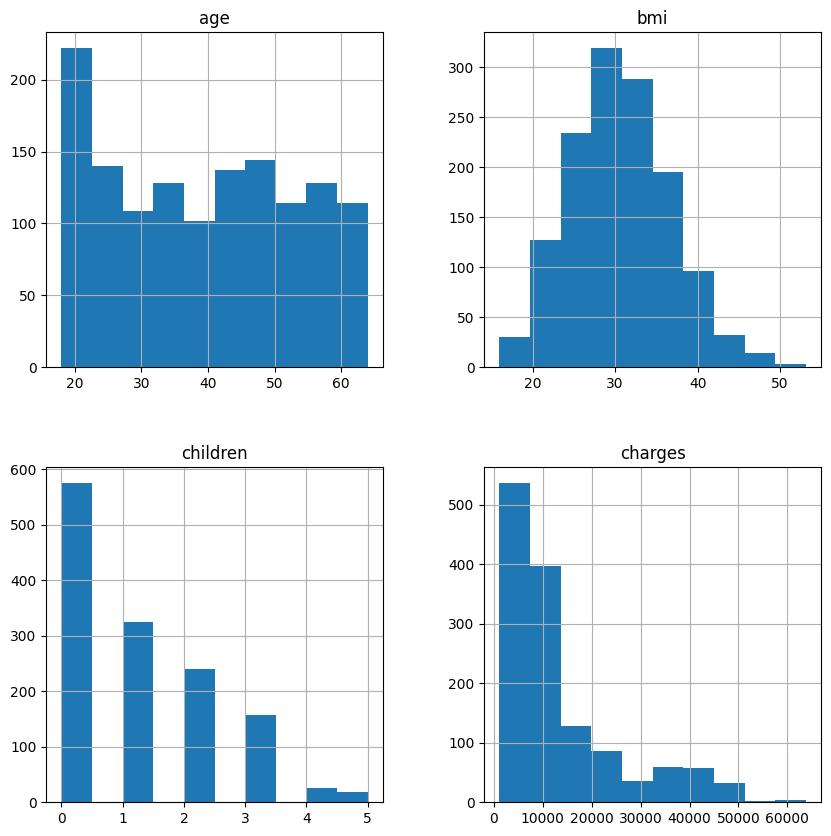

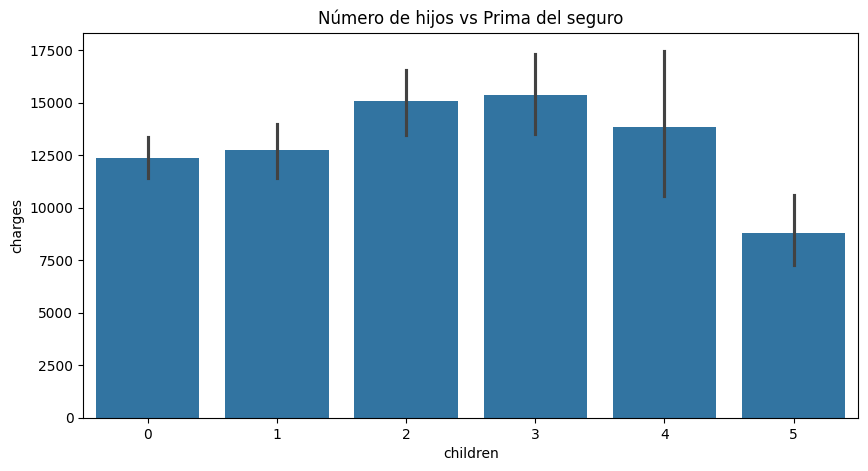

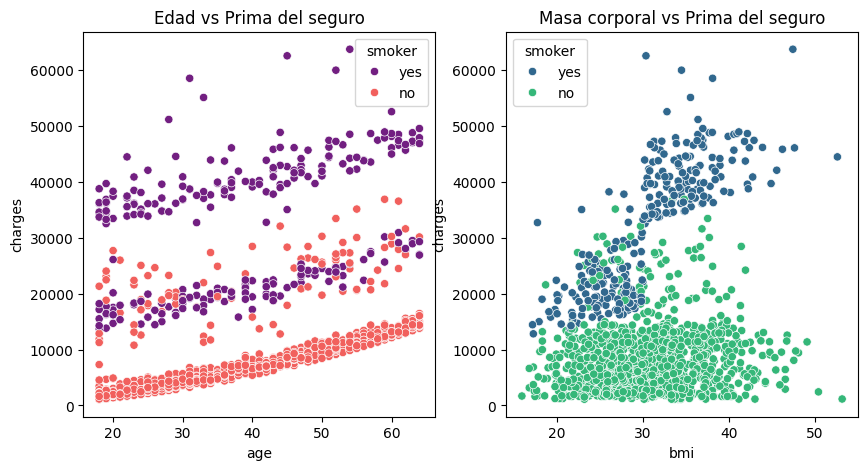

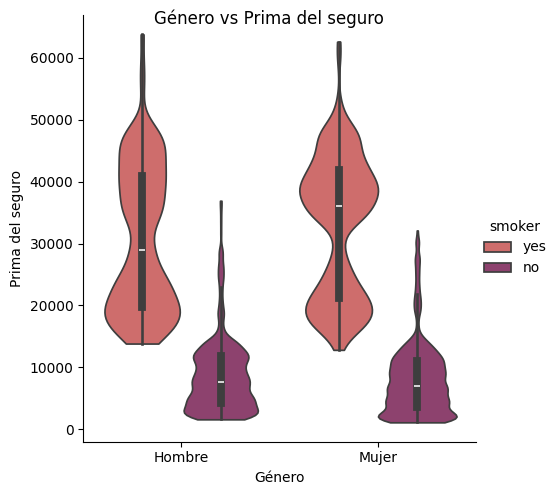

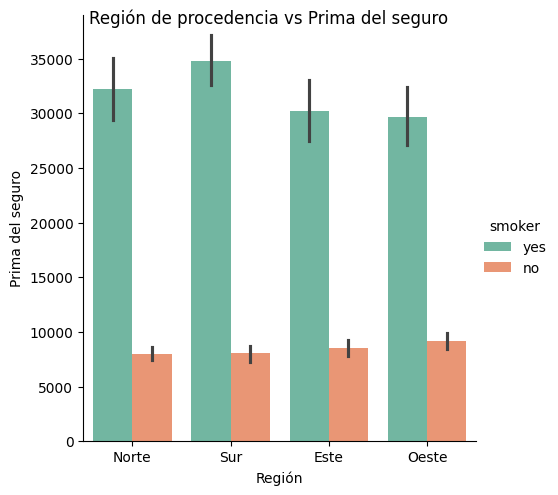

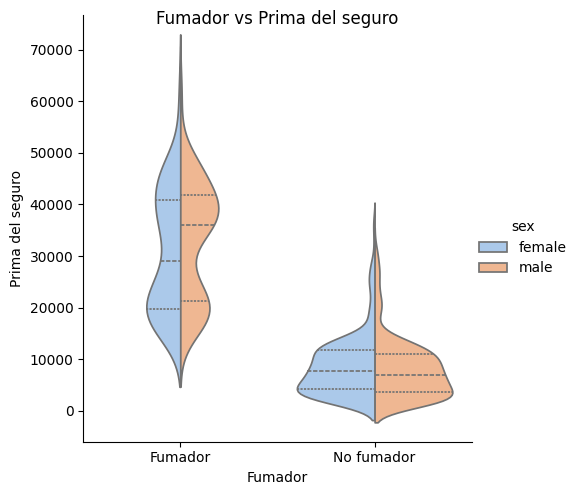

In [18]:
#Empezamos importando la librería matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Visualizamos histogramas de las variables numéricas
data.hist(figsize=(10,10))
plt.show()

#Vamos a analizar las relaciones entre variables
plt.figure(figsize=(10,5))
sns.barplot(x = data["children"], y= data["charges"])
plt.title('Número de hijos vs Prima del seguro')
plt.show()

plot = plt.figure(figsize=(10,5))

ax1 = plot.add_subplot(121)
sns.scatterplot(data = data, x = "age", y = "charges", hue = "smoker",
                palette = 'magma')
ax1.set_title('Edad vs Prima del seguro')

ax2 = plot.add_subplot(122)
sns.scatterplot(data = data, x = "bmi", y = "charges", hue = "smoker",
                palette = 'viridis')
ax2.set_title('Masa corporal vs Prima del seguro')

plt.show()

GVSP = sns.catplot(data = data, x="sex", y="charges", hue="smoker",
    kind="violin", bw_adjust=.5, cut=0, palette = 'flare' )
GVSP.set_xticklabels(["Hombre", "Mujer"])
GVSP.set_axis_labels("Género", "Prima del seguro")
plt.suptitle('Género vs Prima del seguro')
plt.show()

RVSP = sns.catplot(data = data, x = "region", y = "charges", hue = "smoker",
            palette = 'Set2', kind = 'bar')
RVSP.set_xticklabels(["Norte", "Sur", "Este", "Oeste"])
RVSP.set_axis_labels("Región", "Prima del seguro")
plt.suptitle('Región de procedencia vs Prima del seguro')
plt.show()

FVSP = sns.catplot(data = data, x = 'smoker', y = 'charges', hue = 'sex',
                   kind = 'violin', palette = 'pastel',
                   inner="quart", split=True)
FVSP.set_xticklabels(["Fumador", "No fumador"])
FVSP.set_axis_labels("Fumador", "Prima del seguro")
plt.suptitle('Fumador vs Prima del seguro')
plt.show()



**ANALISIS**

Respecto al comportamiento y distribución de las variables, podemos ver que contamos con tres variables numéricas continuas: edad, indice de masa corporal y prima, siendo esta última nuestra variable dependiente. También tenemos una variable numérica discreta, el número de hijos del asegurado, y por último tres variables categóricas: genero, si el asegurado es fumador, y su región de procedencia.

Tomando la prima del seguro, es decir, el coste del mismo para el usuario, como nuestra variable dependiente, podemos empezar a valorar las variables que podrían tener un mayor o menor impacto sobre esta. Una variable que se aprecia de alto impacto es la condición de fumador, ya que vistos los resultados de la última gráfica, y las comparativas con su relación en las demás, vemos que independientemente del resto de condiciones, los fumadores siempre pagan una cuantía notablemente más elevada.

La región, por el contrario, no parece ser relevante, aunque se aprecian diferencias mínimas en el caso de los fumadores, esto podría ser atribuido a otras características contextuales, pero no parece que la región de procedencia sea una variable relevante a tener en cuenta. Por lo que ante un proceso de reducción dimensional esta sería una variable susceptible de ser eliminada.

La edad, como variable continua, tiene un aparente ajuste lineal aunque con una pendiente baja, por contrario el índice de masa corporal parece poder ajustarse como una recta de pendiente más acuciante, lo que se puede ver especialmente claro en el caso de fumadores, habría que estudiar por separado el caso de no fumadores, puesto que la gran diferencia en la prima de seguro propicia que no se pueda observar tan claramente la gráfica en ese tramo.

El género no parece ser una variable tan relevante, aunque si podemos apreciar una diferencia notable en la media entre hombres y mujeres dentro del grupo de los fumadores. Para el caso de no fumadores, la diferencia no es tan apreciable, aunque el máximo valor de la prima para hombres es mayor que para mujeres no fumadoras.

La influencia del número de hijos es dificil de apreciar, pues si bien tiende a aumentar la prima a mayor número de hijos, apreciamos un descenso del máximo promedio al pasar de los 3 hijos por asegurado, pero con una mayor dispersión en los datos, aunque para los casos de 5 hijos si vemos que la prima es notablemente inferior.

